In [1]:
import numpy as np
import pandas as pd 

import os
import copy

In [3]:
import librosa
import matplotlib.pyplot as plt

os.chdir(path) ## can change current directory    np.argmax(x)

In [4]:
# np.argmax(x)
def find_max_and_return_index(mylist):
    co = 0
    mymax = 0
    for i,value in enumerate(mylist):
        if mymax < value:
            mymax = value
            co = i
    return mymax,co

In [5]:
list_folder = os.listdir('C:\Users\YANSILIYU\devProject\gun_sound\dataset')

hop_length = 512 #the default spacing between frames
n_fft = 255 #number of samples

raw_x = []
raw_y = []
for i in list_folder:
    list_file_wave = os.listdir('C:\Users\YANSILIYU\devProject\gun_sound\dataset' + i)
    for j in list_file_wave:
        filename = 'C:\Users\YANSILIYU\devProject\gun_sound\dataset' + i + '/' + j
        data, sr = librosa.load(filename,sr=22050)
        
        raw_x.append(data)
        raw_y.append(i)
        
        
   

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (669388605.py, line 1)

In [5]:
x = []
y = []
for i in range(len(raw_x)):
    data = raw_x[i]
    if len(data) == 44100:
        mfcc_data = np.array(librosa.feature.mfcc(data, n_fft=n_fft,hop_length=hop_length,n_mfcc=128))
        x.append(mfcc_data)
        y.append(raw_y[i])

/opt/conda/lib/python3.7/site-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


In [6]:
x_copy = copy.copy(x)
y_copy = copy.copy(y)

In [7]:
#x_copy = np.array((x_copy-np.min(x_copy))/(np.max(x_copy)-np.min(x_copy)))
#x_copy = x_copy/np.std(x_copy)

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_copy)
y_copy_new = le.transform(y_copy)

# from tensorflow.keras.utils import to_categorical
# y_copy_new = to_categorical(y_copy_new, dtype ="uint8")

In [9]:
len_x_copy = []
for i in range(len(x_copy)):
    temp = x_copy[i].shape
    # print(temp)
    len_x_copy.append(temp)

In [10]:
value, count = np.unique(len_x_copy, return_counts=True)
print(value,count)

[ 87 128] [745 745]


In [11]:
x_copy = np.array(x_copy)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_copy, y_copy_new, test_size=0.25, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)


In [13]:
from tensorflow.keras.layers import LSTM, Dense,Dropout,Flatten
from tensorflow import keras

In [14]:

input_shape = x_copy[0].shape

model = keras.Sequential()
model.add(LSTM(128,input_shape=input_shape,return_sequences=True))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(9, activation='softmax'))
model.summary()
model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128, 128)          110592    
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 48)                3

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_val, y_val), shuffle=False)

2022-01-14 02:20:56.008518: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
6/6 [==============================] - 4s 322ms/step - loss: 2.4434 - accuracy: 0.1172 - val_loss: 2.1916 - val_accuracy: 0.1357
Epoch 2/50
6/6 [==============================] - 1s 218ms/step - loss: 2.2101 - accuracy: 0.1483 - val_loss: 2.1781 - val_accuracy: 0.1071
Epoch 3/50
6/6 [==============================] - 1s 203ms/step - loss: 2.1778 - accuracy: 0.1364 - val_loss: 2.1497 - val_accuracy: 0.2000
Epoch 4/50
6/6 [==============================] - 1s 204ms/step - loss: 2.1239 - accuracy: 0.1651 - val_loss: 2.1059 - val_accuracy: 0.2286
Epoch 5/50
6/6 [==============================] - 1s 205ms/step - loss: 2.1077 - accuracy: 0.1746 - val_loss: 2.1150 - val_accuracy: 0.1286
Epoch 6/50
6/6 [==============================] - 1s 204ms/step - loss: 2.0375 - accuracy: 0.1962 - val_loss: 2.0917 - val_accuracy: 0.2571
Epoch 7/50
6/6 [==============================] - 1s 204ms/step - loss: 1.9534 - accuracy: 0.2488 - val_loss: 2.0562 - val_accuracy: 0.1857
Epoch 8/50
6/6 [====

remember2 = sorted(remember,reverse=True)

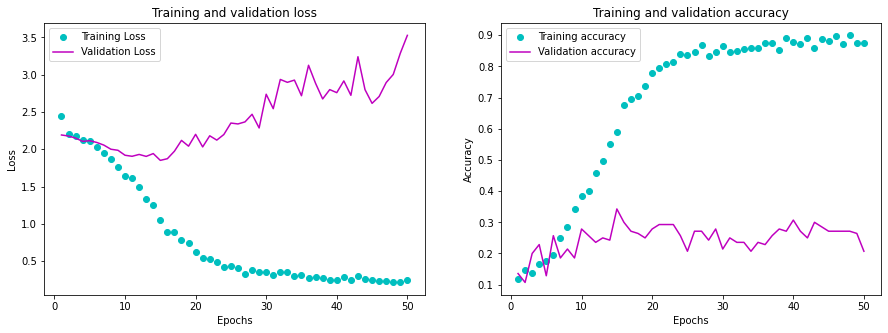

In [16]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,51)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [17]:
from tensorflow.math import confusion_matrix

TrainLoss, Trainacc = model.evaluate(X_train,y_train)
TestLoss, Testacc = model.evaluate(X_test, y_test)
y_pred=model.predict(X_test)
print('Confusion_matrix: ',confusion_matrix(y_test, np.argmax(y_pred,axis=1)))

6/6 [==============================] - 0s 42ms/step - loss: 3.4262 - accuracy: 0.2193
Confusion_matrix:  tf.Tensor(
[[ 2  1  1  1  9  0  2  1  0]
 [ 0  5  0  1  5  1  4  1  0]
 [ 0  0  2  4 15  1  0  3  0]
 [ 0  1  0  2  4 15  1  2  0]
 [ 0  0  2  0 21  1  0  1  0]
 [ 0  1  0 15  4  3  0  2  0]
 [ 0  1  2  2 15  3  1  1  0]
 [ 0  0  1  2 13  2  2  5  0]
 [ 0  0  0  0  2  1  0  0  0]], shape=(9, 9), dtype=int32)


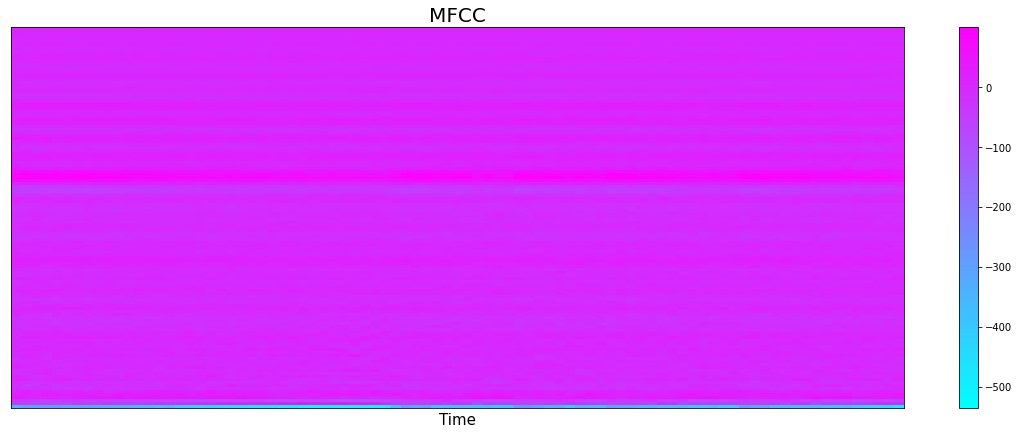

In [18]:
import librosa.display
fig, ax = plt.subplots(figsize=(20,7))
librosa.display.specshow(X_train[0],sr=sr, cmap='cool',hop_length=hop_length)
ax.set_xlabel('Time', fontsize=15)
ax.set_title('MFCC', size=20)
plt.colorbar()
plt.show()